In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import util
import train
import model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
train_loss = np.load('/Users/reza/Downloads/train.npy')
val_loss = np.load('/Users/reza/Downloads/train.npy')

In [3]:
# plt.figure(figsize=(20, 10))
# plt.plot(train)
# plt.plot(val)

In [4]:
enc_state = torch.load('/Users/reza/Downloads/933_enc.pth', map_location=device).state_dict()
dec_1_state = torch.load('/Users/reza/Downloads/933_dec_1.pth', map_location=device).state_dict()
dec_2_state = torch.load('/Users/reza/Downloads/933_dec_2.pth', map_location=device).state_dict()
dec_3_state = torch.load('/Users/reza/Downloads/933_dec_3.pth', map_location=device).state_dict()
fc_state = torch.load('/Users/reza/Downloads/933_fc.pth', map_location=device).state_dict()

In [5]:
enc = model.Encoder(18, 256, 128, 64, device).to(device)
dec_1 = torch.nn.LSTMCell(18, 256).to(device)
dec_2 = torch.nn.LSTMCell(256, 128).to(device)
dec_3 = torch.nn.LSTMCell(128, 64).to(device)
fc = torch.nn.Linear(64, 18).to(device)

In [6]:
enc.load_state_dict(enc_state)
dec_1.load_state_dict(dec_1_state)
dec_2.load_state_dict(dec_2_state)
dec_3.load_state_dict(dec_3_state)
fc.load_state_dict(fc_state)

<All keys matched successfully>

In [7]:
X_train, _ = util.get_raw_data(['/Users/reza/Career/DMLab/MMML_PIL/data/mmpil_v0.1/partition1', '/Users/reza/Career/DMLab/MMML_PIL/data/mmpil_v0.1/partition3'])
X_val, _ = util.get_raw_data(['/Users/reza/Career/DMLab/MMML_PIL/data/mmpil_v0.1/partition5'])

reading from ['/Users/reza/Career/DMLab/MMML_PIL/data/mmpil_v0.1/partition5']


In [23]:
X_train = util.interpolate_properties(X_train)
X_val = util.interpolate_properties(X_val)

In [29]:
_, train_mean, train_std = util.z_normalization(X_train)
X_val = (X_val - train_mean) / train_std

In [26]:
dataset = util.CustomDataset(X_val)
loader = torch.utils.data.DataLoader(dataset, batch_size=512,
                                     shuffle=False, collate_fn=util.batch_second)

In [27]:
loss = torch.nn.SmoothL1Loss()

torch.Size([60, 512, 18])
tensor([-0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854,
        -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854,
        -0.0854, -0.0854, -0.0854, -0.0828, -0.0853, -0.0854, -0.0854, -0.0783,
        -0.0854,  0.7727, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854,
        -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0854, -0.0853,
        -0.0854, -0.0854, -0.0135, -0.0854, -0.0850, -0.0854, -0.0835, -0.0854,
        -0.0854,  0.1203,  0.0519, -0.0164, -0.0847, -0.0854, -0.0854, -0.0854,
        -0.0854, -0.0854, -0.0854, -0.0854])


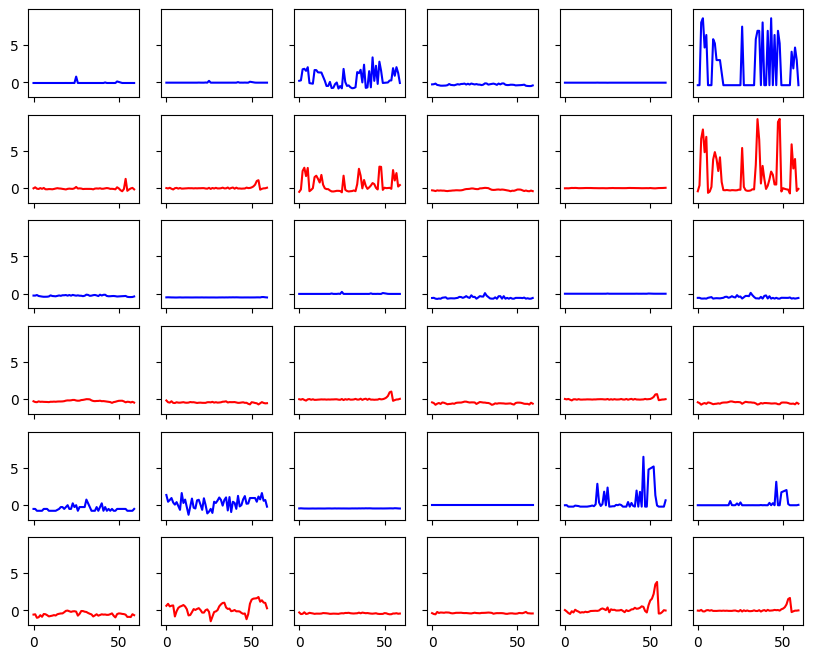

In [28]:
i = 40
a = 5
for batch in loader:
    print(batch.shape)
    instance = batch[:, i:i+1, :]
    # print(instance.shape)
    out, _ = train.predict(instance, enc, dec_1, dec_2, dec_3, fc, loss, device)
    out = out.detach().cpu().numpy()
    # print(out.shape)
    time = np.arange(60)
    # print(instance[:, 0, a].detach().cpu().numpy())
    # print(out[:, 0, a])
    # instance = (instance.detach().cpu().numpy() * TRAINING_STD + TRAINING_MEAN)
    # out = out * TRAINING_STD + TRAINING_MEAN
    fig, axes = plt.subplots(6, 6, figsize=(10, 8), sharex=True, sharey=True)
    # plt.subplot(1, 2, 1)
    print(instance[:, 0, 0])
    axes[0, 0].plot(time, instance[:, 0, 0], color='blue')
    axes[1, 0].plot(time, out[:, 0, 0], color='red')
    axes[0, 1].plot(time, instance[:, 0, 1], color='blue')
    axes[1, 1].plot(time, out[:, 0, 1], color='red')
    axes[0, 2].plot(time, instance[:, 0, 2], color='blue')
    axes[1, 2].plot(time, out[:, 0, 2], color='red')
    axes[0, 3].plot(time, instance[:, 0, 3], color='blue')
    axes[1, 3].plot(time, out[:, 0, 3], color='red')
    axes[0, 4].plot(time, instance[:, 0, 4], color='blue')
    axes[1, 4].plot(time, out[:, 0, 4], color='red')
    axes[0, 5].plot(time, instance[:, 0, 5], color='blue')
    axes[1, 5].plot(time, out[:, 0, 5], color='red')

    axes[2, 0].plot(time, instance[:, 0, 6], color='blue')
    axes[3, 0].plot(time, out[:, 0, 6], color='red')
    axes[2, 1].plot(time, instance[:, 0, 7], color='blue')
    axes[3, 1].plot(time, out[:, 0, 7], color='red')
    axes[2, 2].plot(time, instance[:, 0, 8], color='blue')
    axes[3, 2].plot(time, out[:, 0, 8], color='red')
    axes[2, 3].plot(time, instance[:, 0, 9], color='blue')
    axes[3, 3].plot(time, out[:, 0, 9], color='red')
    axes[2, 4].plot(time, instance[:, 0, 10], color='blue')
    axes[3, 4].plot(time, out[:, 0, 10], color='red')
    axes[2, 5].plot(time, instance[:, 0, 11], color='blue')
    axes[3, 5].plot(time, out[:, 0, 11], color='red')

    axes[4, 0].plot(time, instance[:, 0, 12], color='blue')
    axes[5, 0].plot(time, out[:, 0, 12], color='red')
    axes[4, 1].plot(time, instance[:, 0, 13], color='blue')
    axes[5, 1].plot(time, out[:, 0, 13], color='red')
    axes[4, 2].plot(time, instance[:, 0, 14], color='blue')
    axes[5, 2].plot(time, out[:, 0, 14], color='red')
    axes[4, 3].plot(time, instance[:, 0, 15], color='blue')
    axes[5, 3].plot(time, out[:, 0, 15], color='red')
    axes[4, 4].plot(time, instance[:, 0, 16], color='blue')
    axes[5, 4].plot(time, out[:, 0, 16], color='red')
    axes[4, 5].plot(time, instance[:, 0, 17], color='blue')
    axes[5, 5].plot(time, out[:, 0, 17], color='red')
    break